In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
yahoo_data = pdr.get_data_yahoo(
    'AAPL',
    start=dt.datetime(2006, 1, 1),
    end=dt.datetime(2021, 5, 16),
)

In [3]:
yahoo_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.295634
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.302390
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.284271
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.343235
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.335557
...,...,...,...,...,...,...
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997


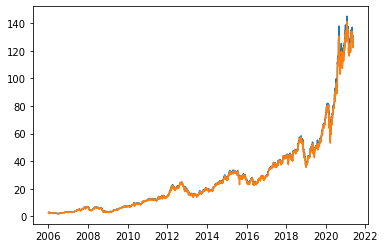

In [4]:
plt.plot(yahoo_data.loc[:, ['High', 'Low']])

In [5]:
yahoo_data.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.016455,0.031142,0.037994,0.002943,-0.232437,0.002943
2006-01-05,-0.014214,-0.010067,-0.003993,-0.007870,-0.274661,-0.007870
2006-01-06,0.024032,0.010847,0.005613,0.025813,0.567473,0.025813
2006-01-09,0.006519,0.015962,0.019668,-0.003277,-0.041758,-0.003277
...,...,...,...,...,...,...
2021-05-10,-0.013104,-0.020621,-0.011005,-0.025805,0.116342,-0.025805
2021-05-11,-0.025243,-0.031859,-0.045669,-0.007410,0.432282,-0.007410
2021-05-12,-0.012909,-0.004236,-0.000810,-0.024939,-0.110751,-0.024939


<AxesSubplot:xlabel='Date'>

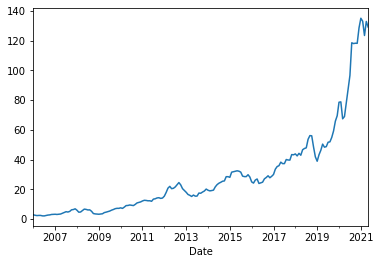

In [6]:
yahoo_data.resample('M').mean()['High'].plot(kind='line')

Log returns

<AxesSubplot:xlabel='Date'>

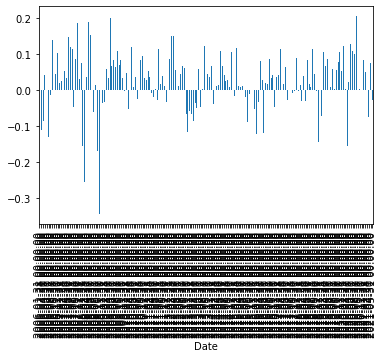

In [7]:
yahoo_data.resample('M').mean()['High'].pct_change().apply(lambda x: np.log(x+1)).plot(kind='bar')

count    3867.000000
mean        0.001215
std         0.020736
min        -0.179195
25%        -0.008364
50%         0.000941
75%         0.011701
max         0.139049
Name: Close, dtype: float64

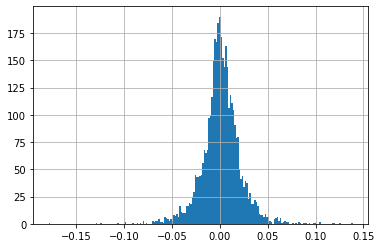

In [8]:
yahoo_data['Close'].pct_change().hist(bins=200)
yahoo_data['Close'].pct_change().describe()

Cumulative daily rate of return

In [9]:
(yahoo_data['Close'].pct_change() + 1).cumprod()

Date
2006-01-03          NaN
2006-01-04     1.002943
2006-01-05     0.995050
2006-01-06     1.020736
2006-01-09     1.017391
                ...    
2021-05-10    47.515717
2021-05-11    47.163612
2021-05-12    45.987422
2021-05-13    46.811504
2021-05-14    47.740466
Name: Close, Length: 3868, dtype: float64

<AxesSubplot:xlabel='Date'>

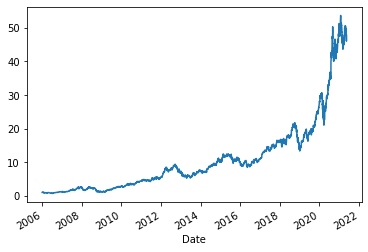

In [10]:
(yahoo_data['Close'].pct_change() + 1).cumprod().plot(kind='line')

In [11]:
(yahoo_data['Close'] / yahoo_data['Close'].iloc[0])

Date
2006-01-03     1.000000
2006-01-04     1.002943
2006-01-05     0.995050
2006-01-06     1.020736
2006-01-09     1.017391
                ...    
2021-05-10    47.515717
2021-05-11    47.163612
2021-05-12    45.987422
2021-05-13    46.811504
2021-05-14    47.740466
Name: Close, Length: 3868, dtype: float64

<AxesSubplot:xlabel='Date'>

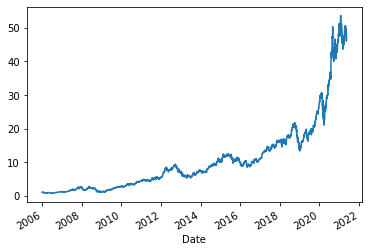

In [12]:
(yahoo_data['Close'] / yahoo_data['Close'].iloc[0]).plot(kind='line')

In [13]:
roll_windows = [
    5, 10, 20, 50, 100
]

In [14]:
yahoo_data['Close'].rolling(5).mean()

Date
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
2006-01-09      2.688929
                 ...    
2021-05-10    128.550003
2021-05-11    128.162004
2021-05-12    127.096002
2021-05-13    126.142001
2021-05-14    125.589999
Name: Close, Length: 3868, dtype: float64

In [15]:
for window in roll_windows:
    yahoo_data[f'roll_avg_{window}'] = yahoo_data['Close'].rolling(window).mean()
yahoo_data

,High,Low,Open,Close,Volume,Adj Close,roll_avg_5,roll_avg_10,roll_avg_20,roll_avg_50,roll_avg_100
Date,,,,,,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.295634,NaN,NaN,NaN,NaN,NaN
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.302390,NaN,NaN,NaN,NaN,NaN
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.284271,NaN,NaN,NaN,NaN,NaN
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.343235,NaN,NaN,NaN,NaN,NaN
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.335557,2.688929,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998,128.550003,130.820001,132.287501,126.9280,129.4526
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004,128.162004,129.972002,131.861501,126.8904,129.4329
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997,127.096002,128.891001,131.398501,126.8434,129.3825


In [16]:
type(pd.to_datetime('01-01-2020'))

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
type(yahoo_data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='Date'>

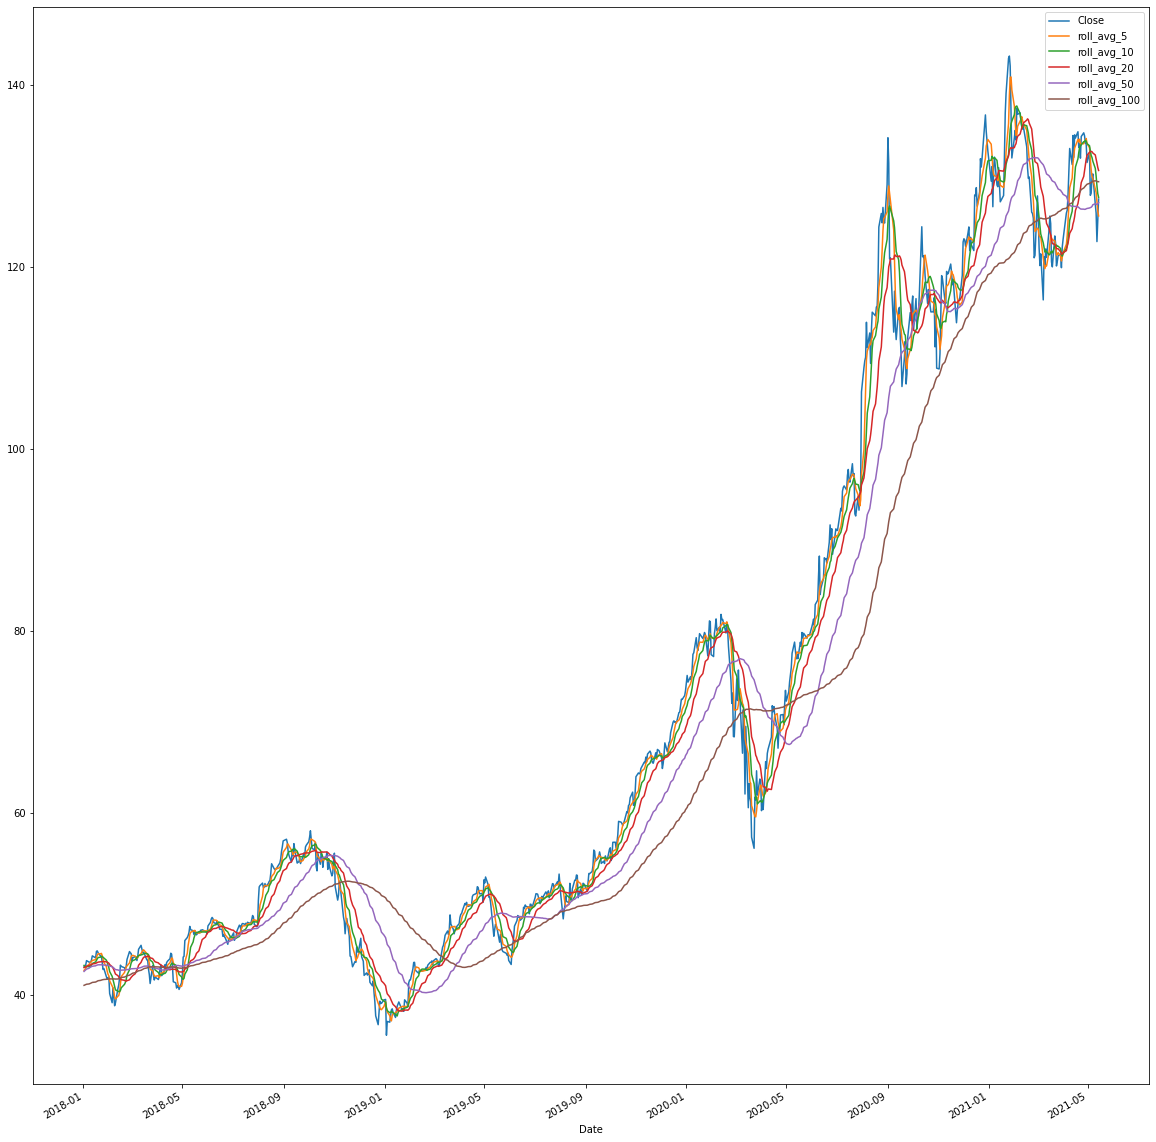

In [18]:
indicators = ['Close'] + [f'roll_avg_{window}' for window in roll_windows]
yahoo_data.loc[
    idx[pd.to_datetime('01-01-2018'):],
    [*indicators]
].plot(kind='line', figsize=(20, 22))

Disons que je compare 5 et 20, uniquement sur 2018+

In [19]:
yahoo_data['5_over_20'] = yahoo_data['roll_avg_5'] > yahoo_data['roll_avg_20']
yahoo_data

,High,Low,Open,Close,Volume,Adj Close,roll_avg_5,roll_avg_10,roll_avg_20,roll_avg_50,roll_avg_100,5_over_20
Date,,,,,,,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.295634,NaN,NaN,NaN,NaN,NaN,False
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.302390,NaN,NaN,NaN,NaN,NaN,False
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.284271,NaN,NaN,NaN,NaN,NaN,False
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.343235,NaN,NaN,NaN,NaN,NaN,False
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.335557,2.688929,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998,128.550003,130.820001,132.287501,126.9280,129.4526,False
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004,128.162004,129.972002,131.861501,126.8904,129.4329,False
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997,127.096002,128.891001,131.398501,126.8434,129.3825,False


Heuristique : achète quand court terme repasse devant long terme.

In [20]:
yahoo_data.shift(1)

,High,Low,Open,Close,Volume,Adj Close,roll_avg_5,roll_avg_10,roll_avg_20,roll_avg_50,roll_avg_100,5_over_20
Date,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,2.669643,2.580357,2.585000,2.669643,807234400.0,2.295634,NaN,NaN,NaN,NaN,NaN,False
2006-01-05,2.713571,2.660714,2.683214,2.677500,619603600.0,2.302390,NaN,NaN,NaN,NaN,NaN,False
2006-01-06,2.675000,2.633929,2.672500,2.656429,449422400.0,2.284271,NaN,NaN,NaN,NaN,NaN,False
2006-01-09,2.739286,2.662500,2.687500,2.725000,704457600.0,2.343235,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,131.259995,129.479996,130.850006,130.210007,78892700.0,130.210007,129.688002,131.607001,132.507001,126.8162,129.4019,False
2021-05-11,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998,128.550003,130.820001,132.287501,126.9280,129.4526,False
2021-05-12,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004,128.162004,129.972002,131.861501,126.8904,129.4329,False


In [21]:
yahoo_data['5_over_20']

Date
2006-01-03    False
2006-01-04    False
2006-01-05    False
2006-01-06    False
2006-01-09    False
              ...  
2021-05-10    False
2021-05-11    False
2021-05-12    False
2021-05-13    False
2021-05-14    False
Name: 5_over_20, Length: 3868, dtype: bool

In [22]:
yahoo_data['buy_signal'] = yahoo_data['5_over_20'] & ~yahoo_data['5_over_20'].shift(1).iloc[1:]
yahoo_data['sell_signal'] = ~yahoo_data['5_over_20'] & yahoo_data['5_over_20'].shift(1).iloc[1:]

In [23]:
buys = yahoo_data.loc[yahoo_data['buy_signal']]
buys

,High,Low,Open,Close,Volume,Adj Close,roll_avg_5,roll_avg_10,roll_avg_20,roll_avg_50,roll_avg_100,5_over_20,buy_signal,sell_signal
Date,,,,,,,,,,,,,,
2006-02-23,2.607143,2.551071,2.563929,2.562500,8.569176e+08,2.203501,2.521500,2.453000,2.508553,NaN,NaN,True,True,False
2006-04-05,2.400357,2.291071,2.311071,2.400357,2.233409e+09,2.064074,2.260714,2.204178,2.249929,2.395550,NaN,True,True,False
2006-07-21,2.183929,2.130000,2.136429,2.168571,8.918924e+08,1.864761,2.004214,1.954000,2.001339,2.117971,2.242836,True,True,False
2006-10-19,2.855357,2.791429,2.830714,2.821071,1.512977e+09,2.425847,2.701643,2.676357,2.688018,2.566843,2.346850,True,True,False
2007-01-09,3.320714,3.041071,3.087500,3.306071,3.349298e+09,2.842900,3.089643,3.012464,3.056071,3.055943,2.834975,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,117.589996,114.129997,115.550003,115.970001,1.380234e+08,115.600609,116.992000,113.955000,115.663500,115.657800,109.812700,True,True,False
2020-12-01,123.470001,120.010002,121.010002,122.720001,1.277282e+08,122.329109,117.912000,117.680999,117.523500,116.092400,113.480075,True,True,False
2021-01-22,139.850006,135.020004,136.279999,139.070007,1.144594e+08,138.627029,132.588000,131.257001,131.570501,125.584400,120.751800,True,True,False


In [24]:
sells = yahoo_data.loc[yahoo_data['sell_signal']]
sells

,High,Low,Open,Close,Volume,Adj Close,roll_avg_5,roll_avg_10,roll_avg_20,roll_avg_50,roll_avg_100,5_over_20,buy_signal,sell_signal
Date,,,,,,,,,,,,,,
2006-03-06,2.418571,2.319286,2.417500,2.338571,9.126656e+08,2.010944,2.431428,2.482143,2.452500,NaN,NaN,False,False,True
2006-05-16,2.437500,2.312500,2.432143,2.320714,9.367400e+08,1.995589,2.423000,2.486786,2.460107,2.365350,NaN,False,False,True
2006-10-06,2.680000,2.636071,2.657857,2.650714,4.669588e+08,2.279357,2.666928,2.704036,2.670179,2.514843,2.309979,False,False,True
2006-12-12,3.172857,3.054643,3.164643,3.076429,1.026620e+09,2.645429,3.143000,3.204250,3.171536,2.948486,2.714561,False,False,True
2007-01-24,3.112500,3.074286,3.095714,3.096429,9.278136e+08,2.662628,3.119714,3.272250,3.142357,3.136679,2.921132,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25,116.750000,115.169998,115.550003,116.029999,7.649920e+07,115.660416,116.205998,117.721999,116.252999,115.470400,112.766625,False,False,True
2021-01-12,129.690002,126.860001,128.500000,128.800003,9.195110e+07,128.389740,129.470000,130.905000,130.080500,123.070800,120.221075,False,False,True
2021-02-12,135.529999,133.690002,134.350006,135.369995,6.014510e+07,135.140442,135.762000,135.603000,135.808000,131.228000,123.660200,False,False,True


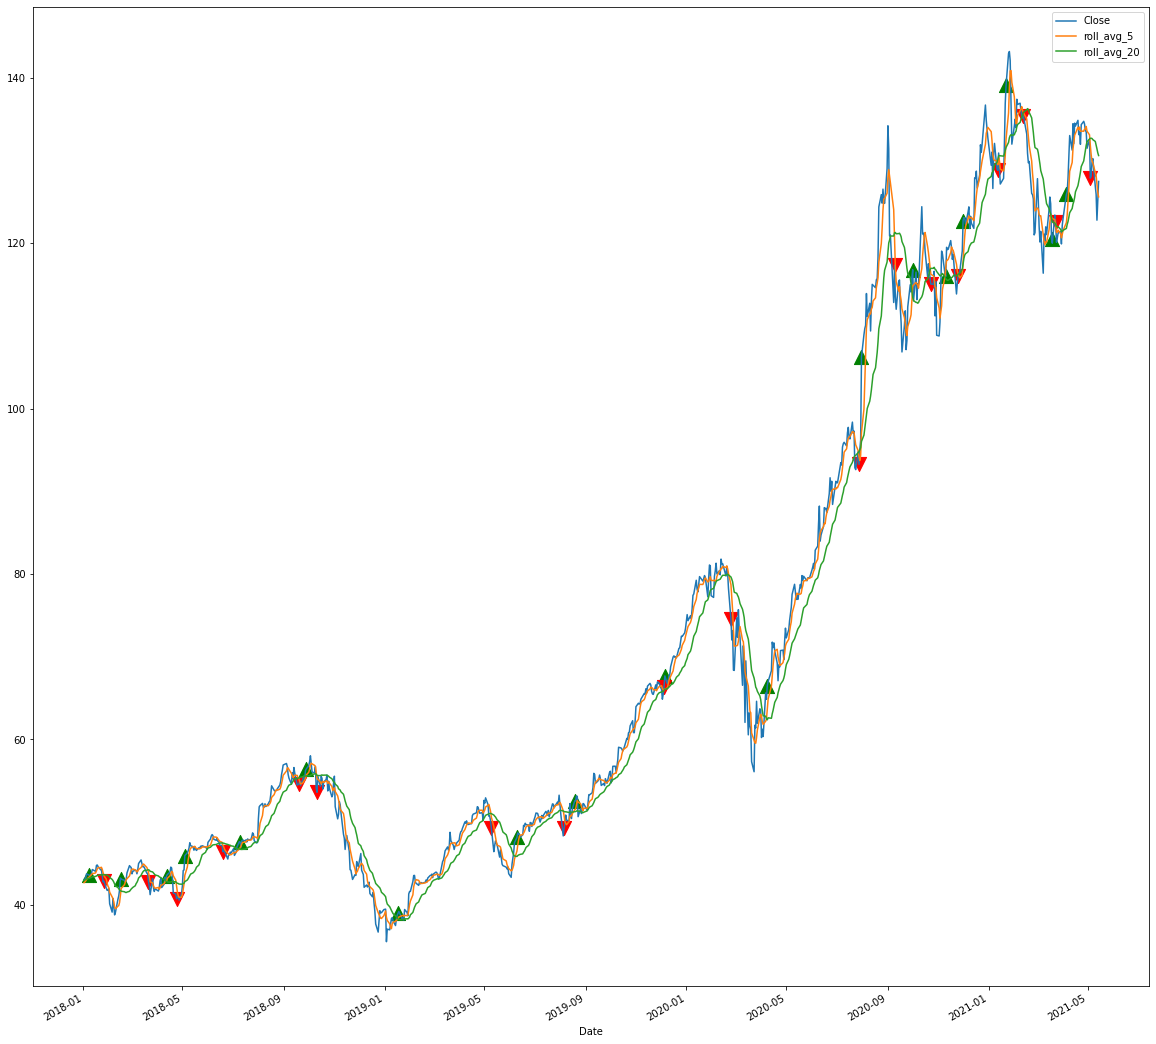

In [25]:
date_from = pd.to_datetime('01-01-2018')

fig, ax = plt.subplots(figsize=(20, 20))

yahoo_data.loc[
    idx[date_from:],
    ['Close', 'roll_avg_5', 'roll_avg_20'],
].plot(ax=ax)

ax.scatter(buys.loc[idx[date_from:]].index, buys.loc[idx[date_from:], ['Close']], marker="^", s=200, color='green')
ax.scatter(sells.loc[idx[date_from:]].index, sells.loc[idx[date_from:], ['Close']], marker="v", s=200, color='red')

In [26]:
def cross_strat(
    price_series,
    short_window,
    long_window,
    ax=None,
):
    short_mv = price_series.rolling(short_window).mean(center=False)
    long_mv = price_series.rolling(long_window).mean(center=False)
    buys =  (short_mv > long_mv) & ~(short_mv > long_mv).shift(1).iloc[1:]
    sells = ~(short_mv > long_mv) & (short_mv > long_mv).shift(1).iloc[1:]
    
    if not ax:
        fig, ax = plt.subplots(figsize=(20, 20))
    
    ax.plot(price_series)
    ax.plot(short_mv)
    ax.plot(long_mv)
    
    ax.scatter(buys[buys].index, price_series[buys[buys].index], marker="^", s=200, color='green')
    ax.scatter(sells[sells].index, price_series[sells[sells].index], marker="v", s=200, color='red')
    
    trades = pd.concat([price_series[sells[sells].index], price_series[buys[buys].index]], keys=['sell', 'buy'])
    rets = price_series[sells[sells].index].sum() - price_series[buys[buys].index].sum()
    print(rets)
    return(trades.swaplevel().sort_index())

In [27]:
yahoo_data['Close']

Date
2006-01-03      2.669643
2006-01-04      2.677500
2006-01-05      2.656429
2006-01-06      2.725000
2006-01-09      2.716071
                 ...    
2021-05-10    126.849998
2021-05-11    125.910004
2021-05-12    122.769997
2021-05-13    124.970001
2021-05-14    127.449997
Name: Close, Length: 3868, dtype: float64

84.78998947143555


Date            
2018-01-23  buy      44.259998
2018-01-25  sell     42.777500
2018-02-15  buy      43.247501
2018-03-20  sell     43.810001
2018-04-09  buy      42.512501
2018-04-23  sell     41.310001
2018-05-04  buy      45.957500
2018-06-18  sell     47.185001
2018-07-06  buy      46.992500
2018-09-13  sell     56.602501
2018-09-27  buy      56.237499
2018-10-10  sell     54.090000
2019-01-15  buy      38.267502
2019-05-09  sell     50.180000
2019-06-07  buy      47.537498
2019-08-05  sell     48.334999
2019-08-16  buy      51.625000
2019-08-29  sell     52.252499
2019-09-04  buy      52.297501
2019-09-26  sell     54.972500
2019-10-01  buy      56.147499
2019-12-04  sell     65.434998
2019-12-10  buy      67.120003
2020-02-05  sell     80.362503
2020-02-07  buy      80.007500
2020-02-24  sell     74.544998
2020-03-31  buy      63.572498
2020-07-24  sell     92.614998
2020-07-31  buy     106.260002
2020-09-09  sell    117.320000
2020-09-30  buy     115.809998
2020-10-22  sell    11

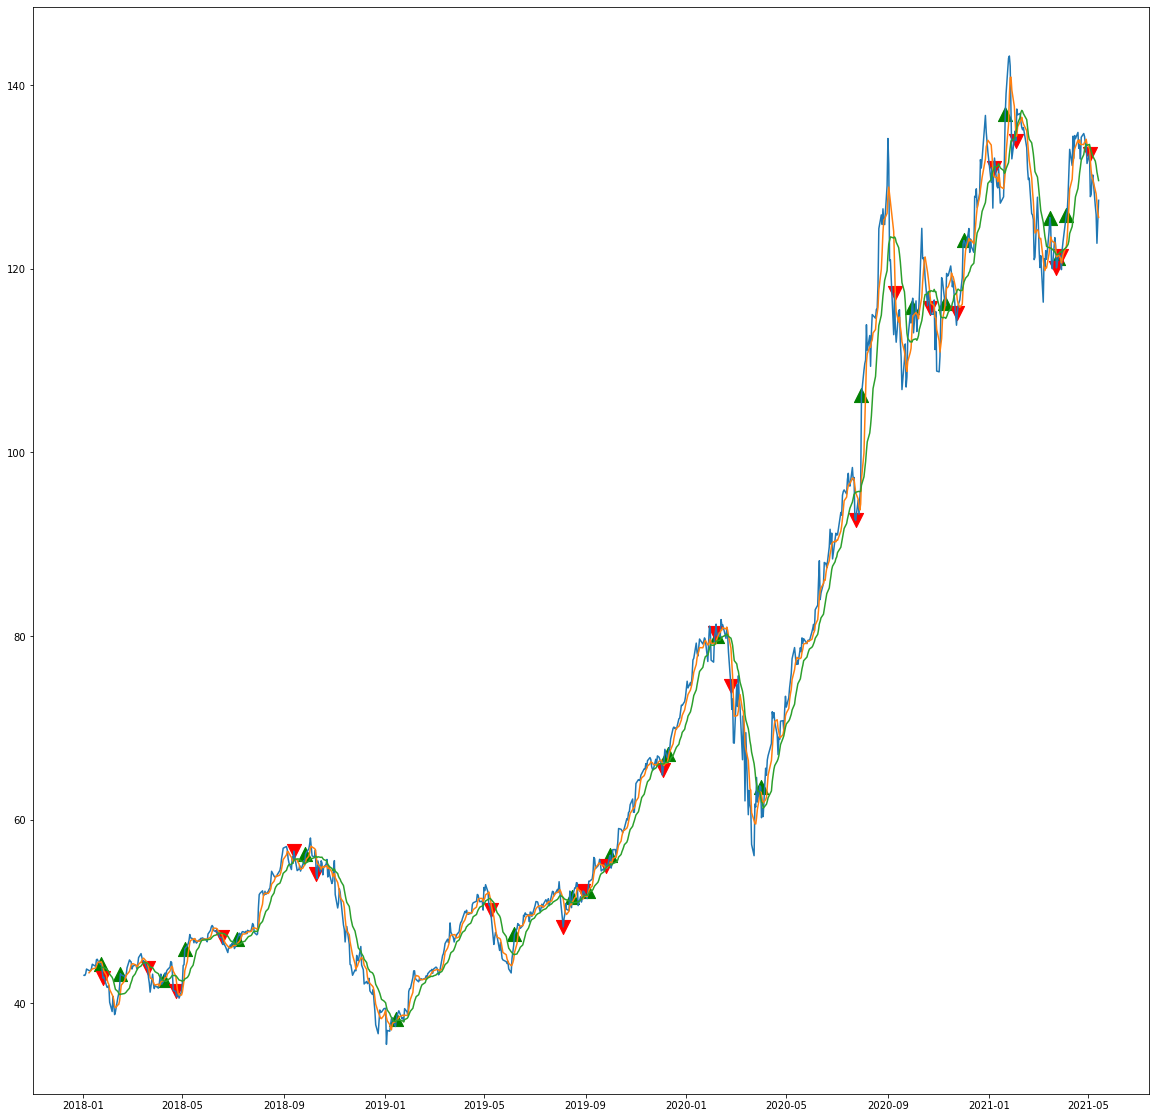

In [32]:
cross_strat(
    pdr.get_data_yahoo(
        'AAPL',
        start=dt.datetime(2006, 1, 1),
        end=dt.datetime(2021, 5, 16),
    ).loc[idx[date_from:], 'Close'],
    5,
    15
)